# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

First, let’s import the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('data/human_body_temperature.csv')

The next step is importing and checking out the data.

QUESTION #1: Is the distribution of body temperatures normal?

In [3]:
len(df)

130

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [6]:
df.temperature.unique()

array([ 99.3,  98.4,  97.8,  99.2,  98. ,  98.8,  98.6,  96.7,  98.2,
        98.7,  98.3,  97.2,  99.4,  98.1,  97.6,  98.5,  99.5,  99.1,
        97.9,  96.4,  96.9,  99. ,  97.4,  97.1,  98.9,  97.7,  97.5,
       100. ,  96.8,  99.9,  97. ,  97.3, 100.8,  96.3])

Now its time to play around with the data and create some visualizations.

 Let's construct a histogram and visually check if the distribution follows a Normal curve.

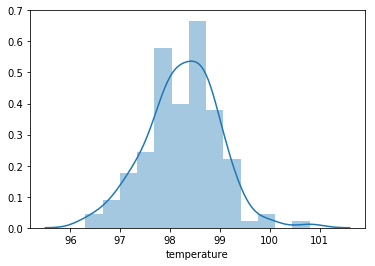

In [17]:
_ = sns.distplot(df['temperature'])

In [18]:
# conduct normal test
from scipy.stats import normaltest
statistic, p_val = normaltest(df['temperature'])

print('chi-square statistic:',statistic)
print('p value =',p_val)

chi-square statistic: 2.703801433319203
p value = 0.2587479863488254


In [19]:
# conduct hypothesis test
alpha = 0.05
if p_val < alpha:
    print("The null hypothesis - that the data comes from a normal distribution - can be rejected")
else:
    print("The null hypothesis - that the data comes from a normal distribution - cannot be rejected")

The null hypothesis - that the data comes from a normal distribution - cannot be rejected


ANSWER #1: Yes, the distribution appears to be normally distributed (p-value = 0.259)

QUESTION #2: Is the sample size large? Are the observations independent?

In [23]:
# test CLT's 1st condition: sample size
if len(df) < 30:
    print("The sample size is too small (n < 30)")
else:
    print("The sample size is greater than (n > 30)")

The sample size is greater than (n > 30)


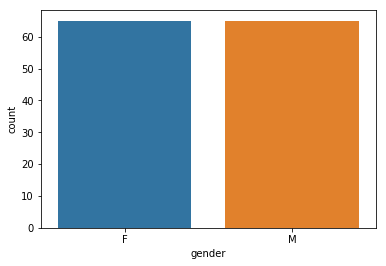

In [24]:
sns.countplot(df['gender'])

NOTE: without unique observation ID's, it's difficult to determine independence, but we will proceed forward with the assumption nontheless

QUESTION #3: Is the true population mean really 98.6 degrees F?

WHY ONE-SAMPLE TEST: we're comparing one type of samples (temperature) to a single, known population mean

In [25]:
# conduct one-sample t-test (justification above)
from scipy.stats import ttest_1samp
t_stat, p_val_t = ttest_1samp(df['temperature'], 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -5.4548232923645195
p value = 2.4106320415561276e-07


In [26]:
# CURIOUS TEST: conduct one-sample z-test
from statsmodels.stats.weightstats import ztest
z_stat, p_val_z = ztest(x1= df['temperature'], value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -5.4548232923645195
p value = 4.9021570141012155e-08


In [27]:
# conduct hypothesis test for t-score
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected")
else:
    print("The null hypothesis - that the true population mean is 98.6 degrees F - cannot be rejected")

The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected


ANSWER #3: No, the true population mean appears to be different than 98.6 degrees (p-value = 2.4 e-07)

In [28]:
# generate random sample
sample = np.random.choice(df['temperature'], size=10)

In [29]:
# conduct one-sample t-test
t_stat, p_val_t = ttest_1samp(sample, 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -0.11620402679754788
p value = 0.9100424670585362


ANSWER #5: The z-test was significant (p-val < 0.05) while the t-test was not. The t-test is appropiate to use here because we're pulling from a population (the dataset) who's standard deviation is known.

QUESTION #6: At what temperature should we consider someone's temperature to be "abnormal"?

In [30]:
# calculate 95% confidence interval
from scipy import stats
conf_int = stats.norm.interval(alpha=0.95, loc=np.mean(df['temperature']), scale=np.std(df['temperature']))

print('95% confidence interval:',conf_int)

95% confidence interval: (96.81775582674824, 99.68070571171332)


ANSWER #6: We can consider a temperature to be "abnormal" if it is less than 96.81 or greater than 99.68

QUESTION #7: Is there a significant difference between males and females in normal temperature?

WHY TWO-SAMPLE TEST: we're comparing the difference of two quantities

In [31]:
# get male and female temperature scores
male_temps = df[df['gender'] == 'M'].temperature
female_temps = df[df['gender'] == 'F'].temperature

In [32]:
# conduct two-sample t-test (justification above)
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(male_temps, female_temps)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -2.2854345381656103
p value = 0.02393188312239561


In [33]:
# conduct hypothesis test
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis - that there is no difference between male and female temperatures - can be rejected")
else:
    print("The null hypothesis - that there is no difference between male and female temperatures - cannot be rejected")

The null hypothesis - that there is no difference between male and female temperatures - can be rejected


ANSWER #7: Yes, the difference in male and female body temperatures is statistically significant.

Analysis Conclusion

1) All in all, it appears that the true normal human body temperature varies from 98.6 degrees fahreneheight.

2) Moreover, normal body temperature varies across a gaussian distribution and should only be considered "abnormal" if it varies outside the range of 96.81-99.68.

3) Finally, there's evidence in the data that there is a statistically significant difference between males and females in normal body temperature.